In [4]:
from manim import *

In [5]:
import sys
import os

# Configuración del directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Directorio raíz
# Configuración de las rutas
sys.path.append(os.path.join(project_root, 'src'))  # Agregar 'src' al path para importaciones

In [6]:
config.media_width = "75%"
config.verbosity = "WARNING"
config.background_color = "#24043d"

In [7]:
%%manim -ql Rectangulos

class Rectangulos(MovingCameraScene):
    
    def construct(self):
        # Obtener el tamaño de la pantalla
        ancho = self.camera.frame_width
        alto = self.camera.frame_height

        # Añadir logo
        logo = ImageMobject("..\\images\\logorobo.png").scale(0.65)
        logo.move_to(DOWN * 2.80 + LEFT * 5.9).set_opacity(0.55)
        self.add(logo)
        
        def crear_rectangulo(ancho, alto, color, opacidad, texto):
            # Crear rectángulo con esquinas redondeadas
            rectangulo = RoundedRectangle(corner_radius=0.1, width=ancho, height=alto).set_fill(color=color, opacity=opacidad)
            # Crear texto
            texto_obj = Text(texto).scale(0.5).move_to(rectangulo.get_center())
            # Agrupar rectángulo y texto
            grupo = Group(rectangulo, texto_obj)
            return grupo

        def get_x(coord_x):
            if coord_x < 0:
                return LEFT * abs(coord_x)
            else:
                return RIGHT * coord_x

        def get_y(coord_y):
            if coord_y < 0:
                return DOWN * abs(coord_y)
            else:
                return UP * coord_y

        def crear_codo(x_punto,  y_punto):
            """ Recibe dos puntos, idealmente del tipo numeros.get_top(), datos.get_left()
            para obtener las coordenadas de interés
            [0] indica el eje x por su posición en la lista de vectores[x, y, z]
            [1] indica el eje y"""
    
            coord_x = get_x(x_punto[0])
            coord_y = get_y(y_punto[1])
            punto_i = Point()
            punto_i.move_to(coord_x + coord_y)

            linea1 = Line(x_punto, punto_i)
            linea2 = Line(y_punto, punto_i)
            codo = VGroup(*[linea1, linea2])
            return codo

        def get_nearest_point(a, b, p):
            """Recibe 3 puntos del espacio R3. Los puntos a y b pertenecen a una recta.
            Mientras que el punto p está fuera de esta. 
                Retorna el punto perteneciente a la recta más cercano al punto p."""
            # Calcular el vector dirección de la recta
            vector_director = b - a
            
            # Calcular un vector que conecta el punto dado con un punto en la recta
            vector_conexion = p - a

            # Calcular la proyección de este vector sobre el vector dirección de la recta
            producto_escalar = np.dot(vector_conexion, vector_director)
            longitud_director_cuadrado = np.dot(vector_director, vector_director)
            proyeccion = (producto_escalar / longitud_director_cuadrado) * vector_director
            # Calcular el punto más cercano en la recta al punto dado
            punto_mas_cercano = a + proyeccion
            return a + proyeccion
            
        def proliferar(secuencia):
            """Toma el primer valor de una secuencia, lo clona y lo replica en el resto de la secuencia"""
            for i in range(len(secuencia)-1, 0, -1):
                # Copiar el valor actual
                copia = secuencia[i].copy()
                # Desplazar la copia a la posición del índice anterior
                copia.move_to(secuencia[i-1].get_center())
                # Transformar el valor actual en la copia
                self.play(Transform(secuencia[i-1], copia), run_time=0.5)     
                                
        # Crear rectángulos con la función crear_rectangulo
        tipos = crear_rectangulo(5, 0.8, "#15CFEA", 0.6, "Tipos de datos en python").move_to(UP * 3 + 0.19 * RIGHT)
        numeros = crear_rectangulo(2, 0.5, "#15CFEA", 0.7, "Numéricos").move_to(UP * 1.5 + LEFT * 5.125)
        enteros = crear_rectangulo(1.5, 0.5, YELLOW, 0.65, "Int").move_to(LEFT*6.25)
        flotantes = crear_rectangulo(1.5, 0.5, "#1ce364", 0.5, "Float").move_to(LEFT * 4)
        booleanos = crear_rectangulo(2, 0.5, "#AC1DB8", 0.85, "Booleanos").next_to(numeros.get_right() + RIGHT * 0.5)
        secuenciales = crear_rectangulo(2.25, 0.5, ORANGE, 0.65, "Secuenciales").next_to(booleanos.get_right() + RIGHT * 0.2)
        listas = crear_rectangulo(1.75, 0.5, PINK, 0.65, "Listas").move_to(ORIGIN + 1.45 * DOWN + RIGHT * 0.2)
        cadena = crear_rectangulo(1.75, 0.5, "#DA1884", 0.8, "String").next_to(listas.get_left() + LEFT * 2.25)
        tuplas = crear_rectangulo(1.5, 0.5, MAROON, 0.75, "Tuplas").next_to(listas.get_right()+ RIGHT * 0.175)
        set = crear_rectangulo(1.75, 0.5, "#05FFA6", 0.65, "Conjunto").next_to(secuenciales.get_right() + RIGHT * 0.5)
        diccionario = crear_rectangulo(2, 0.5, GOLD, 0.85, "Diccionario").next_to(set.get_right() + RIGHT * 0.5)

        #punto_medio = (tipos.get_bottom() - secuenciales.get_top()/2)[1]
        punto = Point(UP * (secuenciales.get_top() + 0.425)).set_color(WHITE)
        codo1 = crear_codo(numeros.get_top(), punto.get_center())
        codo2 = crear_codo(diccionario.get_top(), punto.get_center())
        codo3 = crear_codo(numeros.get_bottom(), enteros.get_right())
        linea1 = Line(tipos.get_bottom(), secuenciales.get_top())
        linea2 = Line(booleanos.get_top(), booleanos.get_top() + 0.425 * UP)
        linea3 = Line(set.get_top(), set.get_top() + 0.425 * UP)
        linea4 = Line(enteros.get_right(), flotantes.get_left())
        linea5 = Line(numeros.get_bottom(), get_nearest_point(linea4.start, linea4.end, numeros.get_bottom()))
        linea6 = Line(secuenciales.get_bottom(), listas.get_top())
        
        punto2 = Point(listas.get_top() + UP * 0.45)
        codo4 = crear_codo(cadena.get_top(), punto2.get_center())
        codo5 = crear_codo(tuplas.get_top(), punto2.get_center())
        self.add(tipos, numeros, flotantes, enteros, booleanos, secuenciales, set, diccionario, codo1, codo2,
                 linea1, linea2, linea3, linea4, linea5, linea6, cadena, listas, tuplas, codo4, codo5)
        # guardar el estado de la escena, sirve para volver a este punto con Restore()
        self.camera.frame.save_state()
        self.wait()
        # agrego el segundo logo para la pantalla auxiliar
        logo2 = logo.copy().move_to((ancho + 6) * LEFT + DOWN * 2.9)
        self.add(logo2)
        # animar escena
        self.wait(5)
        numericos = Group(*[numeros, enteros, flotantes, codo3, linea4, linea5])
        numericos2 = numericos.copy()
        #self.play(numericos2.move_to(LEFT * 14,22 + UP * 3.5))
        movimiento = ancho - abs(numericos2.get_center()[0])
        self.play(self.camera.frame.animate.move_to(numeros))
        self.play(self.camera.frame.animate.move_to(LEFT * 14.22),
        numericos2.animate.shift(movimiento * LEFT + 1.5 * UP), run_time=(2))

        # crear recta para los números
        ax = Axes(axis_config={'tip_shape': StealthTip}, y_length=0.001, tips = None).move_to(ancho * LEFT + 1.5 * DOWN)
        flecha = DoubleArrow(6.5 * LEFT, 6.5 * RIGHT, stroke_width=1.5, max_tip_length_to_length_ratio = 0.75).move_to(14.22 * LEFT + 1.5 * DOWN)
        linea_cero = Line(start=[0, 0, 0], end=[0, 0.25, 0]).move_to(ancho * LEFT + 1.5 * DOWN)
        self.play(Create(ax))
        self.add(flecha, linea_cero)
        # Crear el rectángulo que va a tapar al elemento pasivo

        tapa = crear_rectangulo(1.5, 0.5, "#1ce364", 1, "").next_to(numericos2[2].get_left() + LEFT * 0.25)
        tapa2 = crear_rectangulo(1.5, 0.5, YELLOW, 1, "").next_to(numericos2[1].get_left() + LEFT * 0.25)
        enteros2 = numericos2[1].copy()
        flotantes2 = numericos2[2].copy()
        # crear textos tipos de número
        titulo_enteros = Text("Enteros").scale(0.8).next_to(enteros2.get_left() + 3 * LEFT)
        titulo_flotantes = Text("Decimales").scale(0.8).next_to(flotantes2.get_right() + 0.5 * RIGHT)
        # Crear textos con números para la animación de los enteros
        neg5 = Text("-5").scale(0.7).set_color(YELLOW).move_to((ancho + 1.5) * LEFT + 1 * DOWN)
        cero = Text("0").scale(0.7).set_color(YELLOW).move_to(ancho * LEFT + 1 * DOWN)
        pos17= Text("17").scale(0.7).set_color(YELLOW).move_to((ancho - 1.5 )* LEFT + 1 * DOWN)
        big_neg = Text("-763168973348979577672347541378").scale(0.6).set_color(YELLOW).move_to((ancho + 2) * LEFT + 2 * DOWN)
        big_pos = Text("135679458273498723598273641243").scale(0.6).set_color(YELLOW).move_to((ancho - 2.25 ) * LEFT + 2 * DOWN)
        self.play(Write(titulo_enteros))
        self.add(tapa)
        self.wait(2)
        self.play(Transform(enteros2, pos17), run_time=1.5)
        self.wait(2)
        self.play(Transform(enteros2, neg5), run_time=1.5)
        self.wait(2)
        self.play(Transform(enteros2, cero), run_time=1.5)
        self.wait(2)
        self.play(Transform(enteros2, big_neg), run_time=1.5)
        self.wait(2)
        self.play(Transform(enteros2, big_pos), run_time=1.5)
        
        # Transición a float
        self.wait()
        self.play(Transform(titulo_enteros, titulo_flotantes))
        self.remove(tapa, neg5, cero, pos17, big_neg, big_pos, enteros2)
        self.add(tapa2)
        self.wait(2)
        # Crear textos con números para la animación de floats
        neg_f = Text("-15.27").scale(0.7).set_color("#1ce364").move_to((ancho + 1.5) * LEFT + 1 * DOWN)
        cero = Text("3.141592653589793").scale(0.7).set_color("#1ce364").move_to(11 * LEFT + 1 * DOWN)
        pos_f = Text("0").scale(0.7).set_color("#1ce364").move_to(ancho * LEFT + 1 * DOWN)

        self.play(Transform(flotantes2, neg_f), run_time=1.5)
        self.wait(2)
        self.play(Transform(flotantes2, cero), run_time=1.5)
        self.wait(2)
        self.play(Transform(flotantes2, pos_f), run_time=1.5)
        self.wait(2)
        self.play(Restore(self.camera.frame), run_time = 2.5)

        # Limpiar el cuadro izquierdo
        self.remove(numericos2, ax, flecha, linea_cero, tapa2, flotantes2,
                    titulo_enteros, titulo_flotantes, neg_f, cero, pos_f)
        logo2.move_to((alto + 2.9) * DOWN + 6 * LEFT)
        self.wait(3)
        ############################################# Sección cadena######################################################
        cad_copia = cadena.copy()
        self.play(self.camera.frame.animate.move_to(cadena), run_time=1.5)
        # copiar cadena
        self.play(cad_copia.animate.move_to(abs(-alto + 3.5) * DOWN),
                  self.camera.frame.animate.move_to(alto * DOWN), rate_func=smooth, run_time=1.5)

        que_string = Text("string o cadena = texto", font_size=48).move_to((alto - 2) * DOWN)
        chars = Text("azAZ,;.-!?19\" \' ♫◙").move_to((alto - 1 ) * DOWN )
        hola = Text("Hola mundo!", font_size=48).move_to(alto * DOWN) 
        hola2 = Text("Hola _ mundo!", font_size=48).shift(1*LEFT + (alto -2) * DOWN)
        indices = Text("0 1 2 3 4 5 6 7 8 9", font_size=34)
        indices_b = Text("10", font_size=34)
        conteo = Text("1 2 3 4 5 6 7 8 9", font_size=34)
        conteo_b = Text("10", font_size=34)
        conteo_c = Text("11", font_size=34)
        indices_cadena = Text("Como cuenta Python").scale(0.5).shift(5.25 * LEFT + (alto -1) *DOWN)
        como_contamos = Text("Como contamos").scale(0.5).shift(5.6 * LEFT + alto * DOWN)
        largo_cadena = Text("Largo de la string").scale(0.5).shift(5.6 * LEFT + alto*DOWN)
        posiciones_reversa = Text("Pocisiones en reversa").scale(0.5).shift(5.25 * LEFT + (alto + 1) * DOWN)
        # Crear el texto base para los índices negativos
        base_text = Text("Hola _ mundo!", font_size=34).shift(1*LEFT + (alto - 2)*DOWN)
        # Crear los textos reversos
        reverse_texts = VGroup()
        for i in range(11, 0, -1):
            text = Text(str(-i), font_size=34)
            reverse_texts.add(text)
            
        # Definir el lado del cuadrado
        lado = 0.68
        # Definir el espacio entre los cuadrados
        espacio = 0.075
        # Crear una lista para almacenar los cuadrados
        cuadrados = VGroup()   
        # Crear cada cuadrado y agregarlo a la lista
        for i in range(len(hola2)):
            cuadrado = Square(side_length=lado, fill_color= PINK, fill_opacity=0.65, stroke_width=2)
            cuadrado.move_to(LEFT * 3.15 + i * (lado + espacio) * RIGHT + alto*DOWN)
            cuadrados.add(cuadrado)
        # alinear todos los char del texto con una determinada separación    
        for i, char in enumerate(hola2):
           char.set_x(hola2[0].get_x() + i * 0.75)
        # alinear cuadrados
        for i, cuadrado in enumerate(cuadrados):
           cuadrado.set_x(cuadrados[0].get_x() + i *0.75)
        cuadrados.shift(0.15 * RIGHT  + 2*UP)
        cuadrados_down = cuadrados.copy().shift(2*DOWN).set_color("#CA370B")
        cuadrados_up = cuadrados.copy().shift(1*DOWN).set_color("#0F9B8E")
        cuadrados_reverse = cuadrados.copy().shift(3*DOWN).set_color("#152CEA")
        # alinear chars de "conteo"
        for i, char in enumerate(conteo):
            char.move_to(cuadrados_down[i].get_center())
        conteo_b.move_to(cuadrados_down[9].get_center())
        conteo_c.move_to(cuadrados_down[10].get_center())
        conteo_grupo = Group(*[cuadrados_down, indices, indices_b])
        # alinear chars de "indices"
        for i, char in enumerate(indices):
            char.move_to(cuadrados_up[i].get_center())
        indices_b.move_to(cuadrados_up[10].get_center())
        indices_grupo = Group(*[cuadrados_up, conteo, conteo_b, conteo_c])
        # alinear textos de posiciones reversas
        for i, elem in enumerate(reverse_texts):
            elem.set_x(cuadrados_reverse[0].get_x() + i * 0.75)
            elem.move_to(cuadrados_reverse[i].get_center())

        ############### animación
        self.play(Write(que_string))
        self.wait(4)
        self.play(AddTextLetterByLetter(chars, time_per_char=1.5))
        self.play(AddTextLetterByLetter(hola, time_per_char=1.5))
        self.play(Unwrite(que_string))
        self.play(Unwrite(chars))
        # Agregar los cuadrados a la escena
        self.play(Create(cuadrados))
        cuadrados.set_z_index(-1)
        self.play(Transform(hola, hola2))
        # remover el guíon bajo que utilizaba como placeholder
        self.remove(hola[4])
        # agregar los otros dos grupos de cuadrados y textos
        #self.add(cuadrados_down, cuadrados_up, conteo, conteo_b, conteo_c, indices, indices_b) 
        self.play(Write(como_contamos))
        self.wait(2)
        self.play(Create(cuadrados_down), run_time=3)
        self.play(Write(conteo), run_time=7)
        self.play(Write(conteo_b))
        self.play(Write(conteo_c))
        self.wait(2)
        self.play(Write(indices_cadena))
        self.play(Create(cuadrados_up), run_time=3)
        self.play(Write(indices), run_time=7)
        self.play(Write(indices_b))
        self.wait(3)
        # mostrar que pos - largo da posición reversiva
        posn1 = Group(*[cuadrados_up[-1], indices_b])
        #posn1_copia = posn1.copy()
        lenn1 = Group(*[cuadrados_down[-1], conteo_c])
        #lenn1_copia = lenn1.copy()
        self.play(Indicate(posn1, color = "PURE_GREEN", rate=2), Indicate(lenn1, color = "#F25816", rate = 2))
        #self.add(posn1_copia, lenn1_copia)
        #self.play(Indicate(posn1_copia, color = "PURE_GREEN"), Indicate(lenn1_copia, color=" #F24816"))
        
        self.play(Create(cuadrados_reverse[-1]), Write(reverse_texts[-1]))
        self.play(Transform(como_contamos, largo_cadena))

        # creo la copia del original empezando por el último elemento
        copia11 = conteo_c.copy()
        copia11b = conteo_c.copy()
        # muevo la copia al lugar del cuadrado en la posición [-2]
        copia11b.move_to(cuadrados_down[-2].get_center())
        copia11.move_to(cuadrados_down[-3].get_center())
        #transformo el texto actual en el texto de la copia anterior
        self.play(Transform(conteo_b, copia11b))
        self.play(Transform(conteo[-1], copia11))
        
        # ya puedo operar en la secuencia real
        proliferar(conteo)
        # Texto índices en reversa
        self.play(Write(posiciones_reversa))
        # queda mostrar las posiciones en reversa. tengo que manejar desde el índice -2
        for i in range(len(cuadrados_reverse)-1, -1,-1):
            self.play(Create(cuadrados_reverse[i]), Write(reverse_texts[i]))
   
        self.wait(5)
        self.play(Restore(self.camera.frame), run_time = 2)

In [ ]:
Si tuviésemos que contar los eslabones de una cadena, a quien se le ocurriría empezar de un número que no fuera
el uno. Bueno, a Python sí.

In [19]:
%%manim -ql Rectangulos

class Rectangulos(MovingCameraScene):
    
    def construct(self):
        # Obtener el tamaño de la pantalla
        ancho = self.camera.frame_width
        alto = self.camera.frame_height

        # Añadir logo
        logo = ImageMobject("..\\images\\logorobo.png").scale(0.65)
        logo.move_to(DOWN * 2.80 + LEFT * 5.9).set_opacity(0.55)
        self.add(logo)
        
        def crear_rectangulo(ancho, alto, color, opacidad, texto):
            # Crear rectángulo con esquinas redondeadas
            rectangulo = RoundedRectangle(corner_radius=0.1, width=ancho, height=alto).set_fill(color=color, opacity=opacidad)
            # Crear texto
            texto_obj = Text(texto).scale(0.5).move_to(rectangulo.get_center())
            # Agrupar rectángulo y texto
            grupo = Group(rectangulo, texto_obj)
            return grupo

        def get_x(coord_x):
            if coord_x < 0:
                return LEFT * abs(coord_x)
            else:
                return RIGHT * coord_x

        def get_y(coord_y):
            if coord_y < 0:
                return DOWN * abs(coord_y)
            else:
                return UP * coord_y

        def crear_codo(x_punto,  y_punto):
            """ Recibe dos puntos, idealmente del tipo numeros.get_top(), datos.get_left()
            para obtener las coordenadas de interés
            [0] indica el eje x por su posición en la lista de vectores[x, y, z]
            [1] indica el eje y"""
    
            coord_x = get_x(x_punto[0])
            coord_y = get_y(y_punto[1])
            punto_i = Point()
            punto_i.move_to(coord_x + coord_y)

            linea1 = Line(x_punto, punto_i)
            linea2 = Line(y_punto, punto_i)
            codo = VGroup(*[linea1, linea2])
            return codo

        def get_nearest_point(a, b, p):
            """Recibe 3 puntos del espacio R3. Los puntos a y b pertenecen a una recta.
            Mientras que el punto p está fuera de esta. 
                Retorna el punto perteneciente a la recta más cercano al punto p."""
            # Calcular el vector dirección de la recta
            vector_director = b - a
            
            # Calcular un vector que conecta el punto dado con un punto en la recta
            vector_conexion = p - a

            # Calcular la proyección de este vector sobre el vector dirección de la recta
            producto_escalar = np.dot(vector_conexion, vector_director)
            longitud_director_cuadrado = np.dot(vector_director, vector_director)
            proyeccion = (producto_escalar / longitud_director_cuadrado) * vector_director
            # Calcular el punto más cercano en la recta al punto dado
            punto_mas_cercano = a + proyeccion
            return a + proyeccion
            
        def proliferar(secuencia):
            """Toma el primer valor de una secuencia, lo clona y lo replica en el resto de la secuencia"""
            for i in range(len(secuencia)-1, 0, -1):
                # Copiar el valor actual
                copia = secuencia[i].copy()
                # Desplazar la copia a la posición del índice anterior
                copia.move_to(secuencia[i-1].get_center())
                # Transformar el valor actual en la copia
                self.play(Transform(secuencia[i-1], copia), run_time=0.5)     
                                
        # Crear rectángulos con la función crear_rectangulo
        tipos = crear_rectangulo(5, 0.8, "#15CFEA", 0.6, "Tipos de datos en python").move_to(UP * 3 + 0.19 * RIGHT)
        numeros = crear_rectangulo(2, 0.5, "#15CFEA", 0.7, "Numéricos").move_to(UP * 1.5 + LEFT * 5.125)
        enteros = crear_rectangulo(1.5, 0.5, YELLOW, 0.65, "Int").move_to(LEFT*6.25)
        flotantes = crear_rectangulo(1.5, 0.5, "#1ce364", 0.5, "Float").move_to(LEFT * 4)
        booleanos = crear_rectangulo(2, 0.5, "#AC1DB8", 0.85, "Booleanos").next_to(numeros.get_right() + RIGHT * 0.5)
        secuenciales = crear_rectangulo(2.25, 0.5, ORANGE, 0.65, "Secuenciales").next_to(booleanos.get_right() + RIGHT * 0.2)
        listas = crear_rectangulo(1.75, 0.5, PINK, 0.65, "Listas").move_to(ORIGIN + 1.45 * DOWN + RIGHT * 0.2)
        cadena = crear_rectangulo(1.75, 0.5, "#DA1884", 0.8, "String").next_to(listas.get_left() + LEFT * 2.25)
        tuplas = crear_rectangulo(1.5, 0.5, MAROON, 0.75, "Tuplas").next_to(listas.get_right()+ RIGHT * 0.175)
        set = crear_rectangulo(1.75, 0.5, "#05FFA6", 0.65, "Conjunto").next_to(secuenciales.get_right() + RIGHT * 0.5)
        diccionario = crear_rectangulo(2, 0.5, GOLD, 0.85, "Diccionario").next_to(set.get_right() + RIGHT * 0.5)

        #punto_medio = (tipos.get_bottom() - secuenciales.get_top()/2)[1]
        punto = Point(UP * (secuenciales.get_top() + 0.425)).set_color(WHITE)
        codo1 = crear_codo(numeros.get_top(), punto.get_center())
        codo2 = crear_codo(diccionario.get_top(), punto.get_center())
        codo3 = crear_codo(numeros.get_bottom(), enteros.get_right())
        linea1 = Line(tipos.get_bottom(), secuenciales.get_top())
        linea2 = Line(booleanos.get_top(), booleanos.get_top() + 0.425 * UP)
        linea3 = Line(set.get_top(), set.get_top() + 0.425 * UP)
        linea4 = Line(enteros.get_right(), flotantes.get_left())
        linea5 = Line(numeros.get_bottom(), get_nearest_point(linea4.start, linea4.end, numeros.get_bottom()))
        linea6 = Line(secuenciales.get_bottom(), listas.get_top())
        
        punto2 = Point(listas.get_top() + UP * 0.45)
        codo4 = crear_codo(cadena.get_top(), punto2.get_center())
        codo5 = crear_codo(tuplas.get_top(), punto2.get_center())
        self.add(tipos, numeros, flotantes, enteros, booleanos, secuenciales, set, diccionario, codo1, codo2,
                 linea1, linea2, linea3, linea4, linea5, linea6, cadena, listas, tuplas, codo4, codo5)
        # guardar el estado de la escena, sirve para volver a este punto con Restore()
        self.camera.frame.save_state()
        self.wait()

        # animar escena
        self.wait(5)
        numericos = Group(*[numeros, enteros, flotantes, codo3, linea4, linea5])
        numericos2 = numericos.copy()
        #self.play(numericos2.move_to(LEFT * 14,22 + UP * 3.5))
        movimiento = ancho - abs(numericos2.get_center()[0])
        self.play(self.camera.frame.animate.move_to(numeros))
        self.play(self.camera.frame.animate.move_to(LEFT * 14.22),
        numericos2.animate.shift(movimiento * LEFT + 1.5 * UP), run_time=(2))

        
        self.wait()


In [30]:
from herramientas import *

In [31]:
%%manim -ql CrearSecuencia
class CrearSecuencia(Scene):    
    def construct(self):
        
        def crear_serie_cuadrados(grupo, cuadrado, espaciado, numero):
            for i in range(numero):
                nuevo_cuadrado = cuadrado.copy()
                nuevo_cuadrado.move_to(2 * DOWN + LEFT * 1.5 + i * (cuadrado.side_length + espaciado) * RIGHT)
                grupo.add(nuevo_cuadrado)

            return grupo    
        
        grupo_cuadrados = VGroup()        
        cuadrado = Square(side_length=0.8, fill_color=PINK, fill_opacity=0.75, stroke_width=2)
        cuadrados = crear_serie_cuadrados(grupo_cuadrados, cuadrado, 0.075, 12).shift(2*LEFT)
        self.add(cuadrados)  # Agrega el grupo de cuadrados a la escena
        for i in range(5):
            self.play(cuadrados[i].animate.set_fill(color = RED))

Manim Community v0.18.0

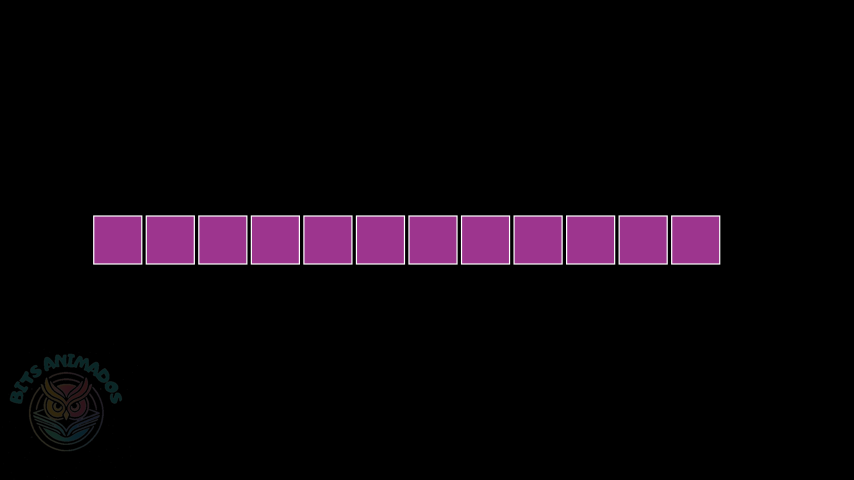

In [4]:
%%manim -ql Slicing

class Slicing(Scene):
    def construct(self):
        # Obtener el tamaño de la pantalla
        ancho = self.camera.frame_width
        alto = self.camera.frame_height

        # Añadir logo
        logo = ImageMobject("..\\images\\bits1.png").scale(0.65)
        logo.move_to(DOWN * 2.9 + LEFT * 6).set_opacity(0.2)
        self.add(logo)

        def crear_serie_cuadrados(grupo, cuadrado, espaciado, numero):
            for i in range(numero):
                nuevo_cuadrado = cuadrado.copy()
                nuevo_cuadrado.move_to(LEFT * 3.15 + i * (cuadrado.side_length + espaciado) * RIGHT)
                grupo.add(nuevo_cuadrado)
            return grupo    
        # Inicializo un grupo que servirá para crear el conjunto de cuadrados
        grupo_cuadrados = VGroup()        
        # inicializo un objeto Square que voy a replicar para crear la cantidad necesaria de cuadrados
        cuadrado = Square(side_length=0.8, fill_color=PINK, fill_opacity=0.75, stroke_width=2)
        # Creo una serie de cuadrados llamando a la función de arriba
        cuadrados = crear_serie_cuadrados(grupo_cuadrados, cuadrado, 0.075, 12).shift(2*LEFT + 2 * DOWN)
        self.add(cuadrados)  # Agrega el grupo de cuadrados a la escena

        
        for i in range(5):
            self.play(cuadrados[i].animate.set_fill(color = RED))